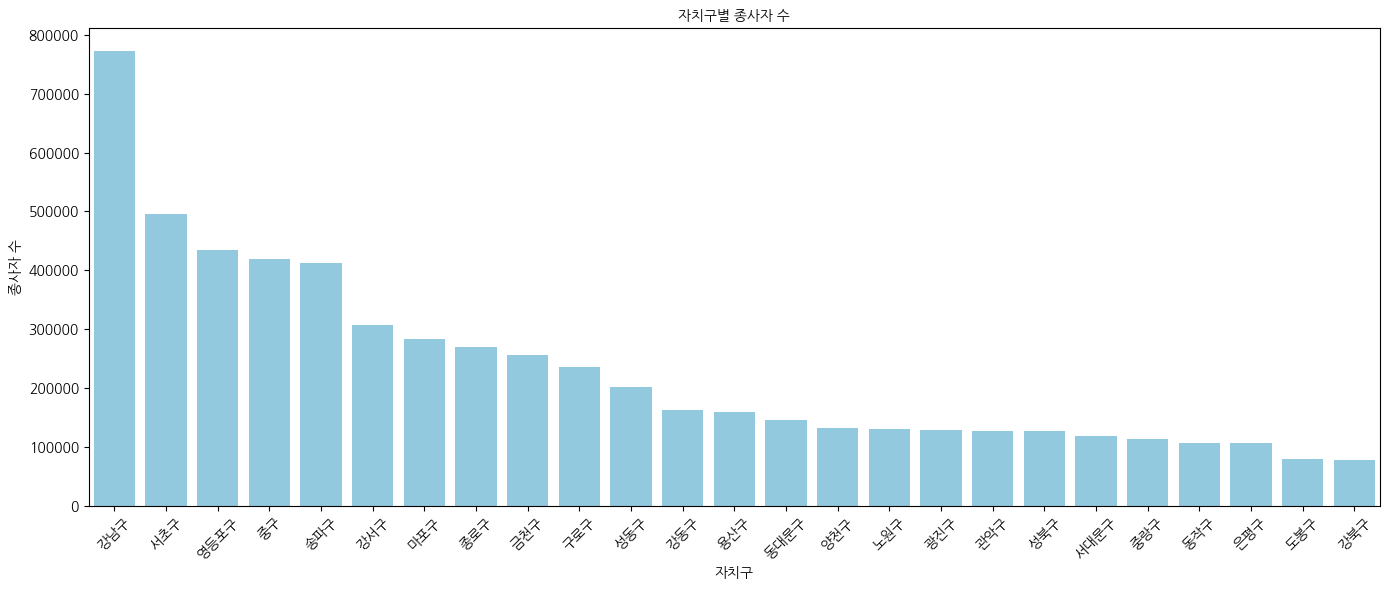

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
from sqlalchemy import create_engine

# ✅ 폰트 설정 (한글 깨짐 방지)
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ 데이터 불러오기 (이미 MySQL에 넣었다면 다시 불러와도 OK)
import mysql.connector
from sqlalchemy import create_engine

# MySQL 연결
user = "root"
password = "jinhyuk2dacibul"
host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com"
port = 3306
database = "project1"
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# 테이블 읽기
df = pd.read_sql("SELECT * FROM business_employment", con=engine)

# ✅ 자치구별 종사자 수 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=df.sort_values(by='num_employees', ascending=False),
            x='gu_name', y='num_employees', color='skyblue')

plt.title("자치구별 종사자 수", fontproperties=fontprop)
plt.xlabel("자치구", fontproperties=fontprop)
plt.ylabel("종사자 수", fontproperties=fontprop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📌 상관계수 (Pearson r): 0.2942


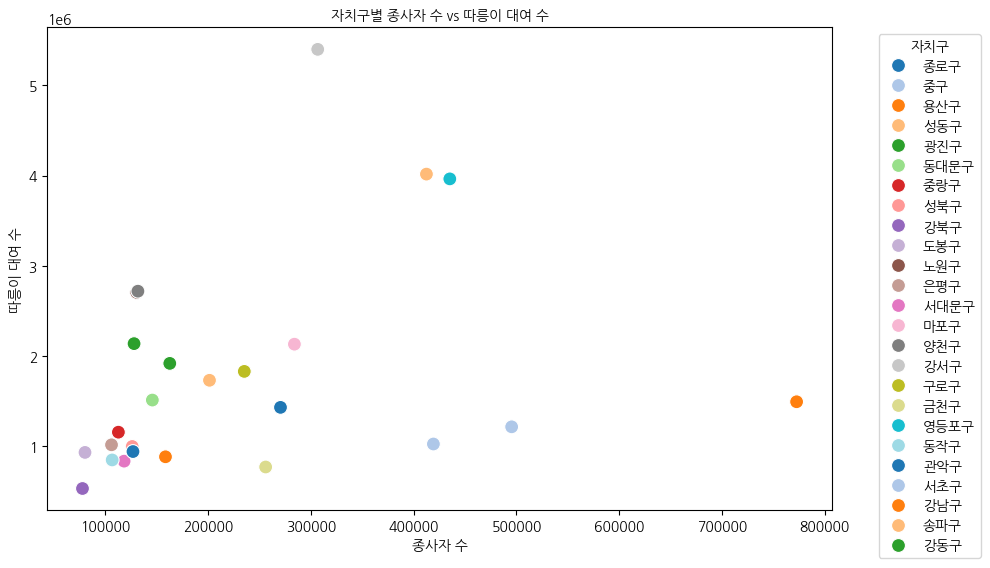

In [3]:

# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
user = "root"
password = "jinhyuk2dacibul"
host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com"
port = 3306
database = "project1"
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# ✅ 데이터 불러오기
df_business = pd.read_sql("SELECT gu_name, num_employees FROM business_employment", con=engine)
df_rentals = pd.read_sql("SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals FROM rental_hourly_gu_summary GROUP BY station_gu", con=engine)

# ✅ 병합 (자치구 기준)
merged_df = pd.merge(df_business, df_rentals, on='gu_name')

# ✅ 상관계수 계산
corr, _ = pearsonr(merged_df['num_employees'], merged_df['total_rentals'])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='num_employees', y='total_rentals', hue='gu_name', s=100, palette='tab20')

plt.title("자치구별 종사자 수 vs 따릉이 대여 수", fontproperties=fontprop)
plt.xlabel("종사자 수", fontproperties=fontprop)
plt.ylabel("따릉이 대여 수", fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20439/247171848.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_business = pd.read_sql(query_business, conn)
/tmp/ipykernel_20439/247171848.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (Pearson r): 0.4232


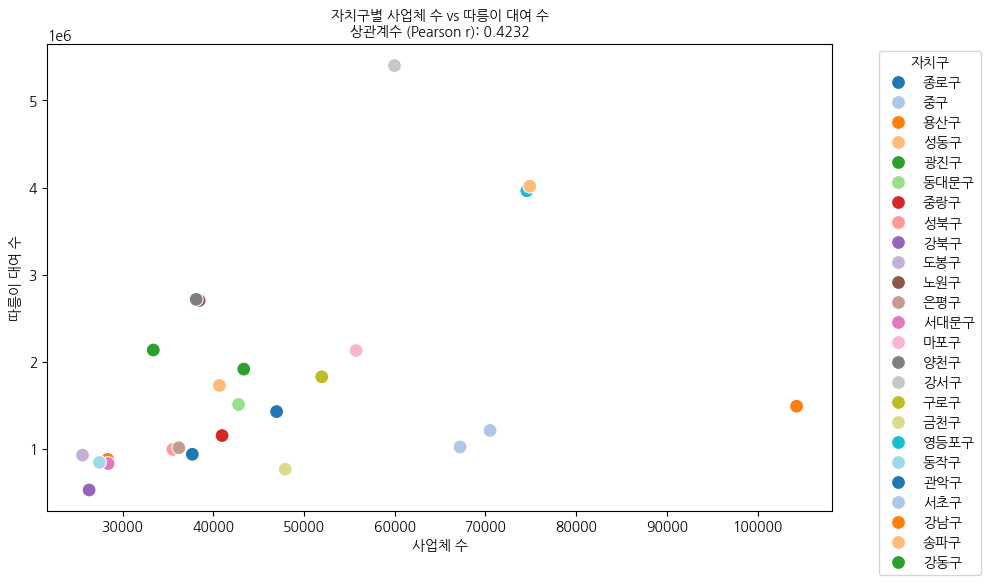

In [4]:

# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 불러오기
query_business = "SELECT gu_name, num_businesses FROM business_employment"
query_rental = """
    SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals 
    FROM rental_hourly_gu_summary 
    GROUP BY station_gu
"""

df_business = pd.read_sql(query_business, conn)
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 병합
merged_df = pd.merge(df_business, df_rental, on="gu_name")

# ✅ 상관계수 계산
corr, _ = pearsonr(merged_df['num_businesses'], merged_df['total_rentals'])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='num_businesses',
    y='total_rentals',
    hue='gu_name',
    palette='tab20',
    s=100
)

plt.title(f'자치구별 사업체 수 vs 따릉이 대여 수\n상관계수 (Pearson r): {corr:.4f}', fontproperties=fontprop)
plt.xlabel('사업체 수', fontproperties=fontprop)
plt.ylabel('따릉이 대여 수', fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20439/188636266.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_density = pd.read_sql(query_density, conn)
/tmp/ipykernel_20439/188636266.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (Pearson r): 0.0187


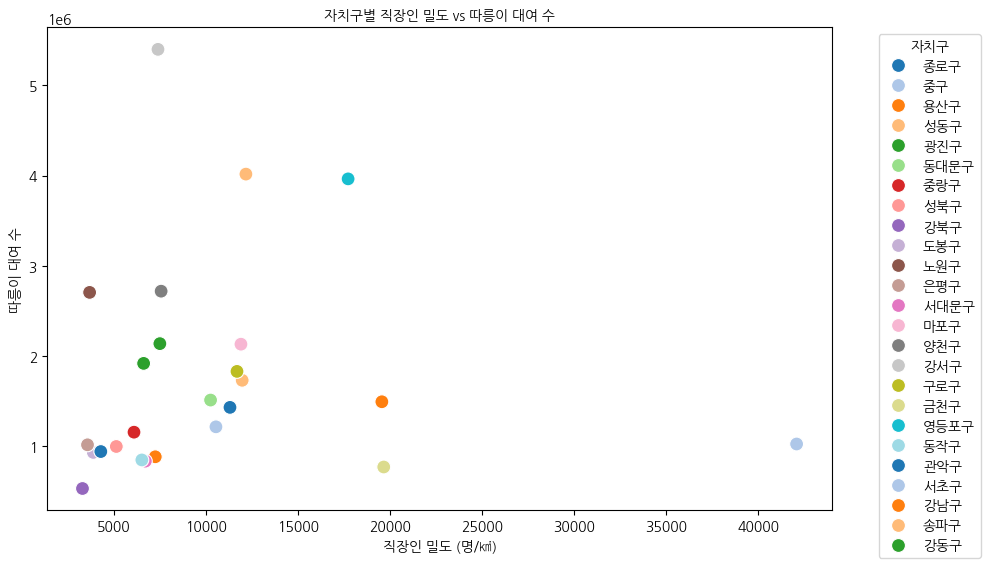

In [5]:


# 🔗 MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1",
    port=3306
)

# 🔎 1. 직장인 밀도 데이터
query_density = """
SELECT gu_name, employee_density FROM business_employment;
"""
df_density = pd.read_sql(query_density, conn)

# 🔎 2. 따릉이 대여량 데이터
query_rental = """
SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

# 🔄 3. 병합
merged_df = pd.merge(df_density, df_rental, on="gu_name")

# 📊 4. 상관계수 계산
corr, _ = pearsonr(merged_df["employee_density"], merged_df["total_rentals"])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# 🔤 5. 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

# 🎯 6. 시각화 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x="employee_density",
    y="total_rentals",
    hue="gu_name",
    palette="tab20",
    s=100
)

plt.title("자치구별 직장인 밀도 vs 따릉이 대여 수", fontproperties=fontprop)
plt.xlabel("직장인 밀도 (명/㎢)", fontproperties=fontprop)
plt.ylabel("따릉이 대여 수", fontproperties=fontprop)
plt.legend(title="자치구", bbox_to_anchor=(1.05, 1), loc="upper left", prop=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20439/2019596365.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_business = pd.read_sql(query_business, conn)
/tmp/ipykernel_20439/2019596365.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_bike = pd.read_sql(query_bike, conn)
/tmp/ipykernel_20439/2019596365.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


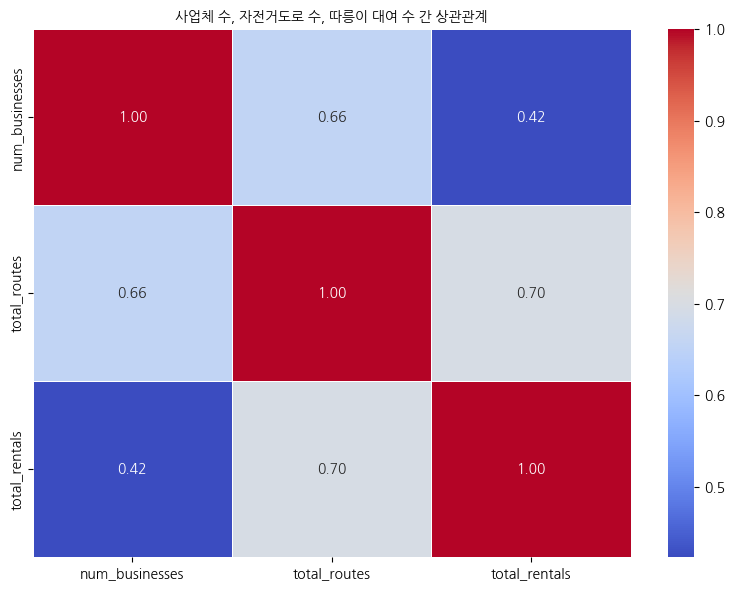

In [6]:

# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 1. 사업체 수
query_business = "SELECT gu_name, num_businesses FROM business_employment"
df_business = pd.read_sql(query_business, conn)

# ✅ 2. 자전거도로 총 노선 수
query_bike = "SELECT gu_name, total_routes FROM bike_roads"
df_bike = pd.read_sql(query_bike, conn)

# ✅ 3. 따릉이 대여 수
query_rental = """
SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 4. 병합
merged = df_business.merge(df_bike, on="gu_name").merge(df_rental, on="gu_name")

# ✅ 5. 상관계수 행렬 계산
corr_matrix = merged[["num_businesses", "total_routes", "total_rentals"]].corr()

# ✅ 6. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("사업체 수, 자전거도로 수, 따릉이 대여 수 간 상관관계", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()


In [ ]:

# ✅ 1. CSV 파일 불러오기
file_path = "/home/kbj/Downloads/사업체+및+종사자+밀도(동별)_20250324160036.csv"
df = pd.read_csv(file_path, encoding='utf-8')  # 인코딩은 필요시 'utf-8'로 바꿔도 됨

# ✅ 2. 컬럼명 영문으로 변경
df.columns = [
    "gu_name",             # 자치구명
    "dong_name",           # 행정동명
    "num_businesses",      # 사업체 수
    "num_employees",       # 종사자 수
    "avg_employees",       # 평균 종사자 수
    "business_density",    # 사업체 밀도
    "employee_density",    # 종사자 밀도 (A)
    "population_density",  # 인구 밀도 (B)
    "employee_to_pop_ratio"  # 종사자밀도비 (A/B * 100)
]

# ✅ 3. MySQL 연결 정보
user = "root"
password = "jinhyuk2dacibul"
host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com"
port = 3306
database = "project1"

# ✅ 4. SQLAlchemy 엔진 생성
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# ✅ 5. 데이터 업로드
df.to_sql("business_employment_dong", con=engine, index=False, if_exists="replace")  # or 'append'

print("✅ MySQL 테이블 업로드 완료: business_employment_dong")


✅ MySQL 테이블 업로드 완료: business_employment_dong
